In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [2]:
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
wegmansData = mydir + "WegmansData_TimeSeries.txt"
wegmans = pd.read_csv(wegmansData, sep=" ")

In [3]:
wegmans.DATE_KEY = pd.to_datetime(wegmans.DATE_KEY,format='%Y-%m-%d')

In [4]:
wegmans = wegmans.sort_values(['DATE_KEY','DEPARTMENT_NAME','CATEGORY_NAME'])

In [5]:
wegmansnew = wegmans.groupby([pd.Grouper(key='DATE_KEY',freq='d'),'DEPARTMENT_NAME', 'CATEGORY_NAME','monthyear'])['SALES'].sum().reset_index()

In [6]:
wegmansnew['Yesterday Sales'] = wegmansnew.groupby(['CATEGORY_NAME'])['SALES'].shift()
wegmansnew['Week Ago Sales'] = wegmansnew.groupby(['CATEGORY_NAME'])['SALES'].shift(7)

In [7]:
wegmansnew['Yesterday Sales'].fillna(0, inplace = True)
wegmansnew['Week Ago Sales'].fillna(0, inplace = True)

In [8]:
wegmansnew['isWeekend'] = (wegmansnew['DATE_KEY'].dt.dayofweek >= 5)

In [9]:
wegmansnew.monthyear = pd.to_datetime(wegmansnew.monthyear,format='%Y/%m')

In [10]:
wegmansmonth = wegmansnew.groupby([pd.Grouper(key='monthyear',freq='MS'),'DEPARTMENT_NAME', 'CATEGORY_NAME'])['SALES'].sum().reset_index()

In [11]:
wegmansmonth['Last Month Sales'] = wegmansmonth.groupby(['CATEGORY_NAME'])['SALES'].shift()

In [12]:
wegmansmonth['Last Month Sales'].fillna(0, inplace = True)

In [219]:
wegmansmonth_dept = wegmansmonth.groupby([pd.Grouper(key='monthyear',freq='MS'),'DEPARTMENT_NAME'])['SALES'].sum().reset_index()

In [220]:
wegmansmonth_dept['Last Month Sales'] = wegmansmonth_dept.groupby(['DEPARTMENT_NAME'])['SALES'].shift()

In [221]:
wegmansmonth_dept['Last Month Sales'].fillna(0, inplace = True)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [17]:
from sklearn.metrics import mean_squared_error
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(wegmansnew['CATEGORY_NAME'])
wegmansnew['CATCODES'] = le.transform(wegmansnew['CATEGORY_NAME'])
le.fit(wegmansnew['DEPARTMENT_NAME'])
wegmansnew['DEPTCODES'] = le.transform(wegmansnew['DEPARTMENT_NAME'])

In [19]:
start_date = datetime.date(2019,1,7)
end_date = datetime.date(2019,12,24)
delta = datetime.timedelta(days=1)
dateidx = start_date

mean_error = []

while dateidx < end_date:
    train = wegmansnew[(wegmansnew['DATE_KEY'] < pd.Timestamp(dateidx)) & (wegmansnew['DATE_KEY'] > pd.Timestamp(dateidx))]
    val = wegmansnew[wegmansnew['DATE_KEY'] == pd.Timestamp(dateidx)]
    
    p = val['Yesterday Sales'].values

    error = rmsle(val['SALES'].values, p)
 
    print('Day %s - Error %.5f' % (str(dateidx), error))
    mean_error.append(error)
    dateidx += delta
print('Mean Error = %.5f' % np.mean(mean_error))

Day 2019-01-07 - Error 79.72573
Day 2019-01-08 - Error 69.68492
Day 2019-01-09 - Error 39.61202
Day 2019-01-10 - Error 59.99947
Day 2019-01-11 - Error 53.24613
Day 2019-01-12 - Error 63.15270
Day 2019-01-13 - Error 74.95350
Day 2019-01-14 - Error 79.31451
Day 2019-01-15 - Error 38.08447
Day 2019-01-16 - Error 188.64412
Day 2019-01-17 - Error 141.64982
Day 2019-01-18 - Error 95.70749
Day 2019-01-19 - Error 113.80105
Day 2019-01-20 - Error 113.43687
Day 2019-01-21 - Error 57.62467
Day 2019-01-22 - Error 102.01852
Day 2019-01-23 - Error 114.35236
Day 2019-01-24 - Error 40.09855
Day 2019-01-25 - Error 47.66070
Day 2019-01-26 - Error 100.06091
Day 2019-01-27 - Error 73.35073
Day 2019-01-28 - Error 71.43154
Day 2019-01-29 - Error 39.26087
Day 2019-01-30 - Error 54.11183
Day 2019-01-31 - Error 49.65118
Day 2019-02-01 - Error 87.49766
Day 2019-02-02 - Error 90.54517
Day 2019-02-03 - Error 125.12509
Day 2019-02-04 - Error 109.04020
Day 2019-02-05 - Error 57.59263
Day 2019-02-06 - Error 38.10963

Day 2019-10-12 - Error 53.23418
Day 2019-10-13 - Error 45.79823
Day 2019-10-14 - Error 75.54924
Day 2019-10-15 - Error 51.82648
Day 2019-10-16 - Error 93.91229
Day 2019-10-17 - Error 36.18157
Day 2019-10-18 - Error 69.38641
Day 2019-10-19 - Error 73.38128
Day 2019-10-20 - Error 59.42490
Day 2019-10-21 - Error 80.74414
Day 2019-10-22 - Error 31.38989
Day 2019-10-23 - Error 45.91506
Day 2019-10-24 - Error 37.33014
Day 2019-10-25 - Error 67.27325
Day 2019-10-26 - Error 62.67349
Day 2019-10-27 - Error 71.80865
Day 2019-10-28 - Error 78.87999
Day 2019-10-29 - Error 54.03751
Day 2019-10-30 - Error 42.79826
Day 2019-10-31 - Error 44.34459
Day 2019-11-01 - Error 56.64102
Day 2019-11-02 - Error 54.07740
Day 2019-11-03 - Error 70.14509
Day 2019-11-04 - Error 90.01630
Day 2019-11-05 - Error 45.86189
Day 2019-11-06 - Error 35.86810
Day 2019-11-07 - Error 34.76726
Day 2019-11-08 - Error 43.59191
Day 2019-11-09 - Error 60.94827
Day 2019-11-10 - Error 51.27942
Day 2019-11-11 - Error 71.86453
Day 2019

In [20]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2019,1,7)
end_date = datetime.date(2020,3,1)
delta = datetime.timedelta(days=1)
windowdelta = datetime.timedelta(days=30)
dateidx = start_date

mean_error = []
wegmanspred = pd.DataFrame() 

while dateidx < end_date:
    print(dateidx)
    train = wegmansnew[(wegmansnew['DATE_KEY'] < pd.Timestamp(dateidx)) & (wegmansnew['DATE_KEY'] > pd.Timestamp(dateidx - windowdelta))]
    val = wegmansnew[wegmansnew['DATE_KEY'] == pd.Timestamp(dateidx)]
    
    if val.size > 0:
        xtr, xts = train[['CATCODES','Yesterday Sales','Week Ago Sales','isWeekend']], val[['CATCODES','Yesterday Sales','Week Ago Sales','isWeekend']]
        ytr, yts = train['SALES'].values, val['SALES'].values
    
        mdl = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)
    
        val.loc[:, 'Prediction'] = np.round(p)
        wegmanspred = pd.concat([wegmanspred,val])
        error = rmsle(yts, p)
        print('Day %s - Error %.5f' % (str(dateidx), error))
        mean_error.append(error)
    dateidx += delta
print('Mean Error = %.5f' % np.mean(mean_error))

2019-01-07
Day 2019-01-07 - Error 86.39041
2019-01-08
Day 2019-01-08 - Error 91.93319
2019-01-09
Day 2019-01-09 - Error 80.06999
2019-01-10
Day 2019-01-10 - Error 35.50296
2019-01-11
Day 2019-01-11 - Error 52.81636
2019-01-12
Day 2019-01-12 - Error 100.32401
2019-01-13
Day 2019-01-13 - Error 91.69448
2019-01-14
Day 2019-01-14 - Error 47.55324
2019-01-15
Day 2019-01-15 - Error 38.52207
2019-01-16
Day 2019-01-16 - Error 189.46650
2019-01-17
Day 2019-01-17 - Error 79.27851
2019-01-18
Day 2019-01-18 - Error 109.13086
2019-01-19
Day 2019-01-19 - Error 100.99215
2019-01-20
Day 2019-01-20 - Error 120.20581
2019-01-21
Day 2019-01-21 - Error 53.95769
2019-01-22
Day 2019-01-22 - Error 106.46954
2019-01-23
Day 2019-01-23 - Error 180.95726
2019-01-24
Day 2019-01-24 - Error 43.62275
2019-01-25
Day 2019-01-25 - Error 56.73962
2019-01-26
Day 2019-01-26 - Error 87.93798
2019-01-27
Day 2019-01-27 - Error 68.18906
2019-01-28
Day 2019-01-28 - Error 50.00461
2019-01-29
Day 2019-01-29 - Error 29.17161
2019

Day 2019-07-16 - Error 23.29021
2019-07-17
Day 2019-07-17 - Error 34.53888
2019-07-18
Day 2019-07-18 - Error 26.05314
2019-07-19
Day 2019-07-19 - Error 26.72254
2019-07-20
Day 2019-07-20 - Error 45.30434
2019-07-21
Day 2019-07-21 - Error 53.35321
2019-07-22
Day 2019-07-22 - Error 32.51947
2019-07-23
Day 2019-07-23 - Error 63.72121
2019-07-24
Day 2019-07-24 - Error 29.58109
2019-07-25
Day 2019-07-25 - Error 78.44586
2019-07-26
Day 2019-07-26 - Error 27.49224
2019-07-27
Day 2019-07-27 - Error 64.69805
2019-07-28
Day 2019-07-28 - Error 33.72891
2019-07-29
Day 2019-07-29 - Error 158.10004
2019-07-30
Day 2019-07-30 - Error 30.73757
2019-07-31
Day 2019-07-31 - Error 481.46868
2019-08-01
Day 2019-08-01 - Error 77.60518
2019-08-02
Day 2019-08-02 - Error 48.07581
2019-08-03
Day 2019-08-03 - Error 52.33328
2019-08-04
Day 2019-08-04 - Error 42.99768
2019-08-05
Day 2019-08-05 - Error 126.35944
2019-08-06
Day 2019-08-06 - Error 38.62719
2019-08-07
Day 2019-08-07 - Error 29.46515
2019-08-08
Day 2019

Day 2020-01-23 - Error 90.63011
2020-01-24
Day 2020-01-24 - Error 68.68649
2020-01-25
Day 2020-01-25 - Error 38.81249
2020-01-26
Day 2020-01-26 - Error 70.93374
2020-01-27
Day 2020-01-27 - Error 46.49041
2020-01-28
Day 2020-01-28 - Error 139.79608
2020-01-29
Day 2020-01-29 - Error 42.64969
2020-01-30
Day 2020-01-30 - Error 55.59759
2020-01-31
Day 2020-01-31 - Error 42.99580
2020-02-01
Day 2020-02-01 - Error 50.73998
2020-02-02
Day 2020-02-02 - Error 48.72939
2020-02-03
Day 2020-02-03 - Error 63.62430
2020-02-04
Day 2020-02-04 - Error 62.42298
2020-02-05
Day 2020-02-05 - Error 45.84399
2020-02-06
Day 2020-02-06 - Error 24.37638
2020-02-07
Day 2020-02-07 - Error 36.40784
2020-02-08
Day 2020-02-08 - Error 48.04403
2020-02-09
Day 2020-02-09 - Error 40.05866
2020-02-10
Day 2020-02-10 - Error 42.73246
2020-02-11
Day 2020-02-11 - Error 30.51551
2020-02-12
Day 2020-02-12 - Error 52.64762
2020-02-13
Day 2020-02-13 - Error 79.06447
2020-02-14
Day 2020-02-14 - Error 59.95768
2020-02-15
Day 2020-0

In [21]:
wegmanspred.to_csv('prepandemic_30daywindow.csv')

In [22]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2020,3,1)
end_date = datetime.date(2020,12,31)
delta = datetime.timedelta(days=1)
dateidx = start_date

while dateidx <= end_date:
    print(dateidx)
    val = wegmansnew[wegmansnew['DATE_KEY'] == pd.Timestamp(dateidx)] 
    if val.size > 0:
        xts = val[['CATCODES','Yesterday Sales','Week Ago Sales','isWeekend']]
        p = mdl.predict(xts)
        val.loc[:, 'Prediction'] = np.round(p)
        wegmanspred = pd.concat([wegmanspred,val])
    dateidx += delta

2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-11
2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-19
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-25
2020-04-26
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-01
2020-05-02
2020-05-03
2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30

In [23]:
wegmanspred.to_csv('2019and2020predictions_30dayswindow.csv')

In [24]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2019,1,7)
end_date = datetime.date(2020,3,1)
delta = datetime.timedelta(days=1)
windowdelta = datetime.timedelta(days=30)
dateidx = start_date

mean_error_lgbm = []
wegmanspredlgbm = pd.DataFrame() 

while dateidx < end_date:
    print(dateidx)
    train_lgbm = wegmansnew[(wegmansnew['DATE_KEY'] < pd.Timestamp(dateidx)) & (wegmansnew['DATE_KEY'] > pd.Timestamp(dateidx - windowdelta))]
    val_lgbm = wegmansnew[wegmansnew['DATE_KEY'] == pd.Timestamp(dateidx)]
    
    if val_lgbm.size > 0:
        xtr_lgbm, xts_lgbm = train_lgbm[['CATCODES','Yesterday Sales','Week Ago Sales','isWeekend']], val_lgbm[['CATCODES','Yesterday Sales','Week Ago Sales','isWeekend']]
        ytr_lgbm, yts_lgbm = train_lgbm['SALES'].values, val_lgbm['SALES'].values
    
        mdl_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
        mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))

        p_lgbm = np.expm1(mdl_lgbm.predict(xts_lgbm))
    
        val_lgbm.loc[:, 'Prediction'] = np.round(p_lgbm)
        wegmanspredlgbm = pd.concat([wegmanspredlgbm,val_lgbm])
        error_lgbm = rmsle(yts_lgbm, p_lgbm)
        print('Day %s - Error %.5f' % (str(dateidx), error_lgbm))
        mean_error_lgbm.append(error_lgbm)
    dateidx += delta
print('Mean Error = %.5f' % np.mean(mean_error_lgbm))

2019-01-07
Day 2019-01-07 - Error 81.73828
2019-01-08
Day 2019-01-08 - Error 96.85362
2019-01-09
Day 2019-01-09 - Error 109.58056
2019-01-10
Day 2019-01-10 - Error 54.01500
2019-01-11
Day 2019-01-11 - Error 66.04314
2019-01-12
Day 2019-01-12 - Error 80.75780
2019-01-13
Day 2019-01-13 - Error 111.87561
2019-01-14
Day 2019-01-14 - Error 38.45213
2019-01-15
Day 2019-01-15 - Error 42.44034
2019-01-16
Day 2019-01-16 - Error 216.75677
2019-01-17
Day 2019-01-17 - Error 98.89386
2019-01-18
Day 2019-01-18 - Error 117.67309
2019-01-19
Day 2019-01-19 - Error 66.82850
2019-01-20
Day 2019-01-20 - Error 104.74740
2019-01-21
Day 2019-01-21 - Error 53.95632
2019-01-22
Day 2019-01-22 - Error 103.98016
2019-01-23
Day 2019-01-23 - Error 75.74016
2019-01-24
Day 2019-01-24 - Error 37.07451
2019-01-25
Day 2019-01-25 - Error 38.88396
2019-01-26
Day 2019-01-26 - Error 130.51491
2019-01-27
Day 2019-01-27 - Error 114.09419
2019-01-28
Day 2019-01-28 - Error 45.67551
2019-01-29
Day 2019-01-29 - Error 39.06186
201

Day 2019-07-16 - Error 22.35699
2019-07-17
Day 2019-07-17 - Error 37.29818
2019-07-18
Day 2019-07-18 - Error 30.33204
2019-07-19
Day 2019-07-19 - Error 30.24017
2019-07-20
Day 2019-07-20 - Error 46.03224
2019-07-21
Day 2019-07-21 - Error 56.29518
2019-07-22
Day 2019-07-22 - Error 43.86206
2019-07-23
Day 2019-07-23 - Error 32.80375
2019-07-24
Day 2019-07-24 - Error 27.88324
2019-07-25
Day 2019-07-25 - Error 76.44637
2019-07-26
Day 2019-07-26 - Error 25.52559
2019-07-27
Day 2019-07-27 - Error 83.14132
2019-07-28
Day 2019-07-28 - Error 36.28165
2019-07-29
Day 2019-07-29 - Error 176.41642
2019-07-30
Day 2019-07-30 - Error 35.51540
2019-07-31
Day 2019-07-31 - Error 480.44821
2019-08-01
Day 2019-08-01 - Error 46.67527
2019-08-02
Day 2019-08-02 - Error 43.82592
2019-08-03
Day 2019-08-03 - Error 32.43759
2019-08-04
Day 2019-08-04 - Error 38.75395
2019-08-05
Day 2019-08-05 - Error 44.86037
2019-08-06
Day 2019-08-06 - Error 40.49819
2019-08-07
Day 2019-08-07 - Error 29.05930
2019-08-08
Day 2019-

Day 2020-01-24 - Error 40.88900
2020-01-25
Day 2020-01-25 - Error 33.37037
2020-01-26
Day 2020-01-26 - Error 47.75550
2020-01-27
Day 2020-01-27 - Error 38.99989
2020-01-28
Day 2020-01-28 - Error 149.92373
2020-01-29
Day 2020-01-29 - Error 21.58871
2020-01-30
Day 2020-01-30 - Error 30.25688
2020-01-31
Day 2020-01-31 - Error 41.97258
2020-02-01
Day 2020-02-01 - Error 59.23596
2020-02-02
Day 2020-02-02 - Error 46.44698
2020-02-03
Day 2020-02-03 - Error 50.46743
2020-02-04
Day 2020-02-04 - Error 28.38728
2020-02-05
Day 2020-02-05 - Error 49.36721
2020-02-06
Day 2020-02-06 - Error 23.15304
2020-02-07
Day 2020-02-07 - Error 35.68815
2020-02-08
Day 2020-02-08 - Error 42.96110
2020-02-09
Day 2020-02-09 - Error 43.91451
2020-02-10
Day 2020-02-10 - Error 27.96251
2020-02-11
Day 2020-02-11 - Error 27.37713
2020-02-12
Day 2020-02-12 - Error 51.00186
2020-02-13
Day 2020-02-13 - Error 55.65671
2020-02-14
Day 2020-02-14 - Error 63.94621
2020-02-15
Day 2020-02-15 - Error 97.20333
2020-02-16
Day 2020-0

In [25]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2020,3,1)
end_date = datetime.date(2020,12,31)
delta = datetime.timedelta(days=1)
dateidx = start_date

while dateidx <= end_date:
    print(dateidx)
    val_lgbm = wegmansnew[wegmansnew['DATE_KEY'] == pd.Timestamp(dateidx)] 
    if val_lgbm.size > 0:
        xts_lgbm = val_lgbm[['CATCODES','Yesterday Sales','Week Ago Sales','isWeekend']]
        p_lgbm = mdl_lgbm.predict(xts_lgbm)
        val_lgbm.loc[:, 'Prediction'] = np.round(p_lgbm)
        wegmanspredlgbm = pd.concat([wegmanspredlgbm,val_lgbm])
    dateidx += delta

2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-11
2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-19
2020-04-20
2020-04-21
2020-04-22
2020-04-23
2020-04-24
2020-04-25
2020-04-26
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-01
2020-05-02
2020-05-03
2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30

In [26]:
wegmanspredlgbm.to_csv('2019and2020pred_30daywindow_lbgbm.csv')

In [27]:
wegmansmonth_overall = wegmansmonth.groupby([pd.Grouper(key='monthyear',freq='MS')])['SALES'].sum().reset_index()

In [28]:
wegmansmonth_overall = wegmansmonth_overall.astype({'SALES': 'int32'})

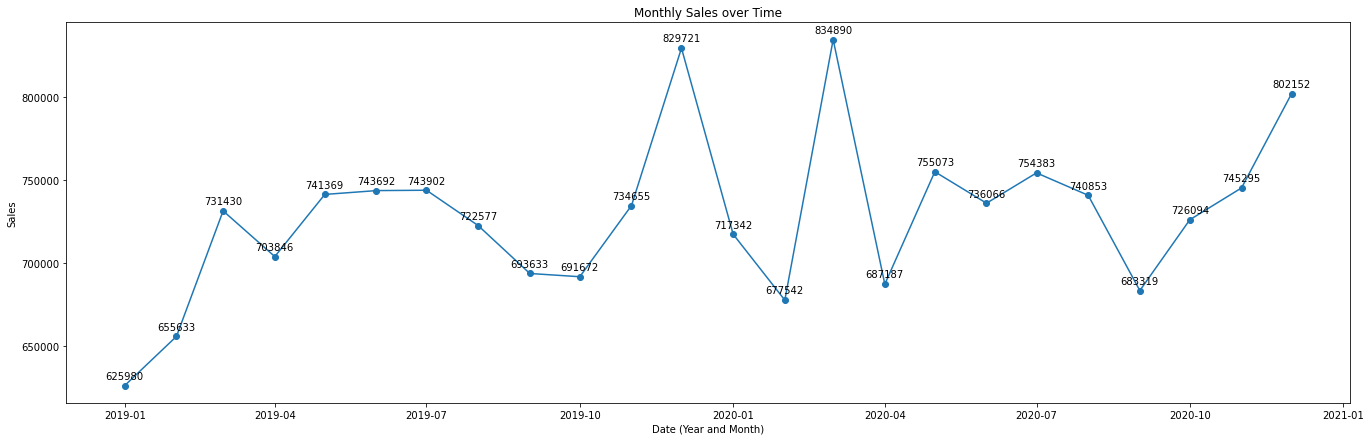

In [29]:
wegmansmonth_overall["monthyear"] =  pd.to_datetime(wegmansmonth_overall["monthyear"])
x = wegmansmonth_overall['monthyear']
y = round(wegmansmonth_overall['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

for i, label in enumerate(y):
    plt.annotate(label, (x[i], y[i]+4000),ha='center')

plt.title("Monthly Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [222]:
wegmansmonth_dept['sales_diff'] = wegmansmonth_dept['SALES'] - wegmansmonth_dept['Last Month Sales']

In [223]:
wegmansmonth_dept['salesdiff_perc'] = (wegmansmonth_dept['sales_diff'])/(wegmansmonth_dept['SALES'])

In [224]:
wegmansmonth_dept

,monthyear,DEPARTMENT_NAME,SALES,Last Month Sales,sales_diff,salesdiff_perc
0,2019-01-01,ASIAN,1921.81,0.00,1921.81,1.000000
1,2019-01-01,BAKESHOP,13406.94,0.00,13406.94,1.000000
2,2019-01-01,BEER & WINE COOLERS,10705.80,0.00,10705.80,1.000000
3,2019-01-01,BEVERAGE CONTAINER RETURNS,0.00,0.00,0.00,NaN
4,2019-01-01,BULK FOODS,4063.91,0.00,4063.91,1.000000
...,...,...,...,...,...,...
1026,2020-12-01,"SALADS, SANDWICHES & SOUPS",5081.23,4529.79,551.44,0.108525
1027,2020-12-01,SPECIAL PROMOTIONS,21.60,0.00,21.60,1.000000
1028,2020-12-01,SUSHI,6255.57,5825.15,430.42,0.068806
1029,2020-12-01,ULTIMATE COFFEE,308.94,383.42,-74.48,-0.241082


In [225]:
mostchange = wegmansmonth_dept.groupby(['monthyear','DEPARTMENT_NAME'], as_index=False).agg({"salesdiff_perc": "mean"}).sort_values(('salesdiff_perc'), ascending=False)

In [227]:
mostchange = mostchange[mostchange.monthyear != '2019-01-01']

In [228]:
mostchange = mostchange[mostchange.salesdiff_perc.notnull()]

In [229]:
mostchange = mostchange[mostchange.salesdiff_perc != -np.inf]

In [230]:
mostchange = mostchange[(mostchange['monthyear'] >= '2020-01-01')]

In [231]:
mostchange.head(20)

,monthyear,DEPARTMENT_NAME,salesdiff_perc
570,2020-02-01,DIGITAL FULFILLMENT,1.000000
699,2020-05-01,DIGITAL FULFILLMENT,1.000000
1027,2020-12-01,SPECIAL PROMOTIONS,1.000000
548,2020-01-01,PHARMACY OTC,0.837605
725,2020-05-01,RESTAURANTS,0.814365
962,2020-11-01,FROZEN MEAT,0.613860
850,2020-08-01,PHARMACY RX,0.585109
572,2020-02-01,FLORAL,0.569319
729,2020-05-01,WBRAND & OTHER,0.552810
665,2020-04-01,GM SEASONAL MERCHANDISE,0.548977


In [247]:
mostchange.tail(20)

,monthyear,DEPARTMENT_NAME,salesdiff_perc
901,2020-09-01,WBRAND & OTHER,-0.774417
794,2020-07-01,GM SEASONAL MERCHANDISE,-0.779272
530,2020-01-01,FRESH SEAFOOD,-0.899596
683,2020-04-01,"SALADS, SANDWICHES & SOUPS",-0.913586
535,2020-01-01,GM FOR FOOD (HOUSEWARES),-0.921077
520,2020-01-01,CARD DEPARTMENT,-0.965312
639,2020-03-01,RESTAURANTS,-1.013773
893,2020-09-01,PHARMACY RX,-1.033854
596,2020-02-01,RESTAURANTS,-1.092059
685,2020-04-01,ULTIMATE COFFEE,-1.124195


In [233]:
wegmansmonth_DFdept = wegmansmonth_dept[wegmansmonth_dept.DEPARTMENT_NAME == 'DIGITAL FULFILLMENT']

In [234]:
wegmansmonth_DFdept = wegmansmonth_DFdept[wegmansmonth_DFdept.salesdiff_perc != -np.inf]

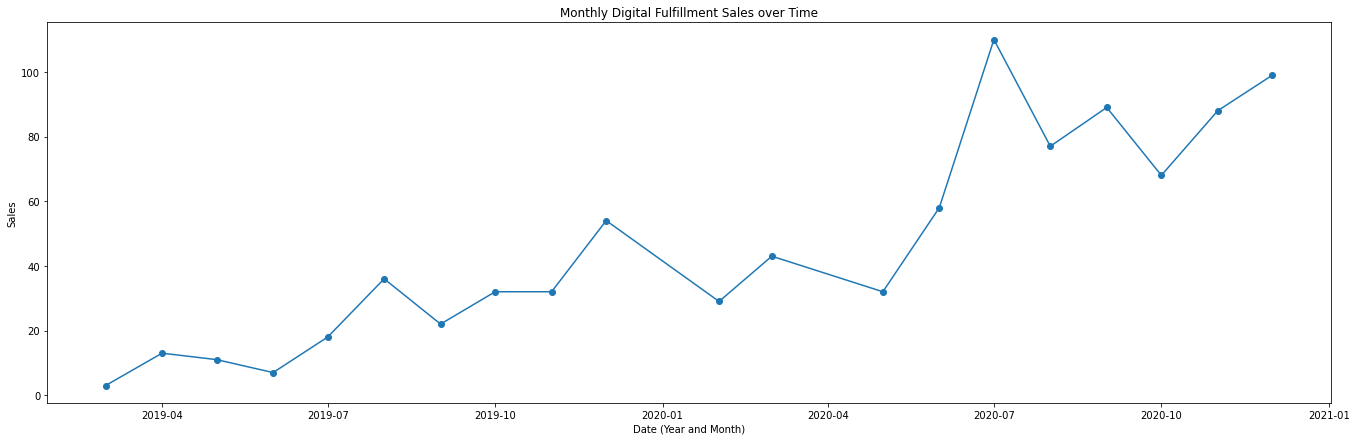

In [235]:
wegmansmonth_DFdept["monthyear"] =  pd.to_datetime(wegmansmonth_DFdept["monthyear"])
x = wegmansmonth_DFdept['monthyear']
y = round(wegmansmonth_DFdept['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

plt.title("Monthly Digital Fulfillment Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [236]:
wegmansmonth_OTCdept = wegmansmonth_dept[wegmansmonth_dept.DEPARTMENT_NAME == 'PHARMACY OTC']

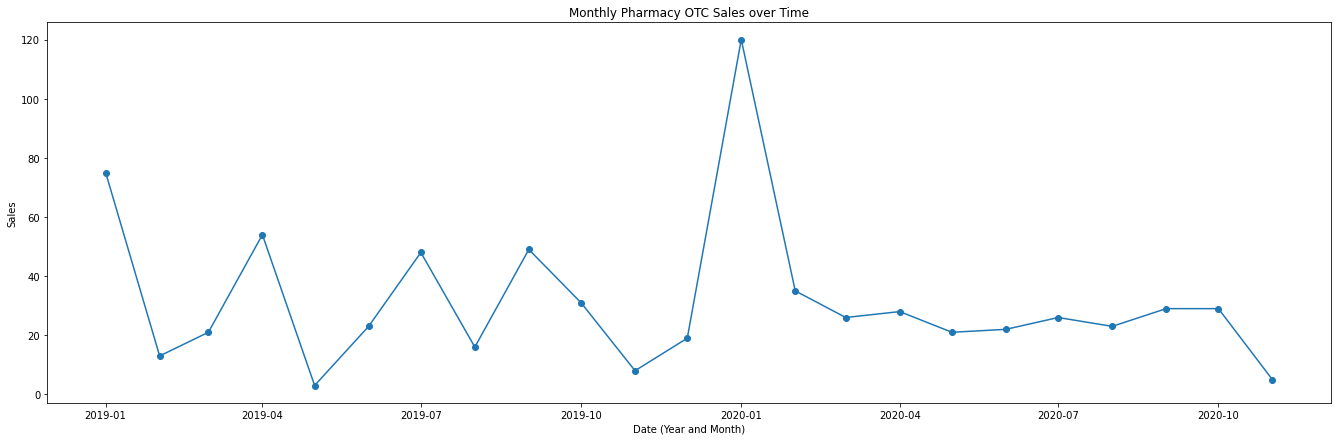

In [237]:
wegmansmonth_OTCdept["monthyear"] =  pd.to_datetime(wegmansmonth_OTCdept["monthyear"])
x = wegmansmonth_OTCdept['monthyear']
y = round(wegmansmonth_OTCdept['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

plt.title("Monthly Pharmacy OTC Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [238]:
wegmansmonth_RXdept = wegmansmonth_dept[wegmansmonth_dept.DEPARTMENT_NAME == 'PHARMACY RX']

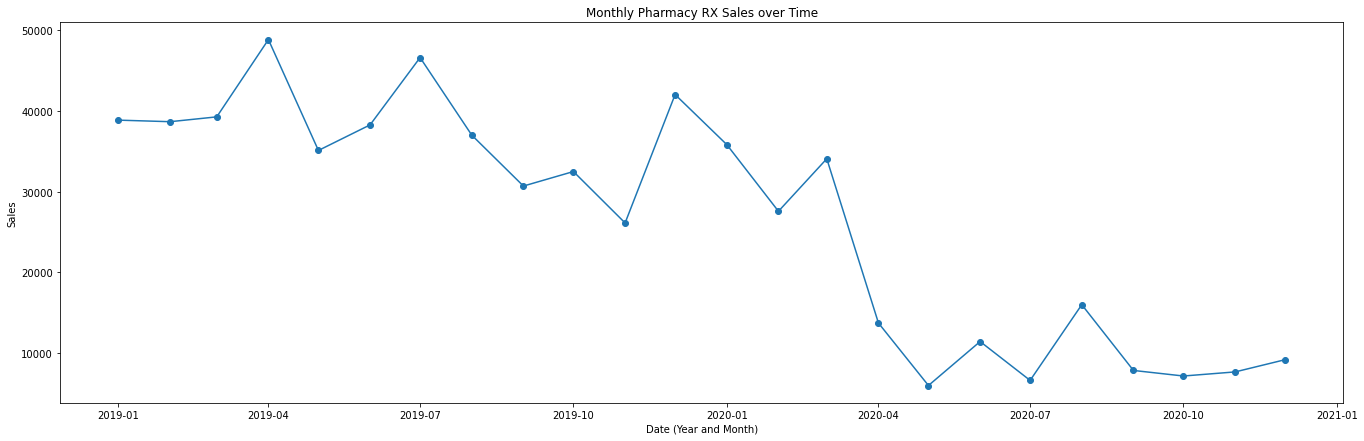

In [239]:
wegmansmonth_RXdept["monthyear"] =  pd.to_datetime(wegmansmonth_RXdept["monthyear"])
x = wegmansmonth_RXdept['monthyear']
y = round(wegmansmonth_RXdept['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

plt.title("Monthly Pharmacy RX Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [240]:
wegmansmonth_RESTdept = wegmansmonth_dept[wegmansmonth_dept.DEPARTMENT_NAME == 'RESTAURANTS']

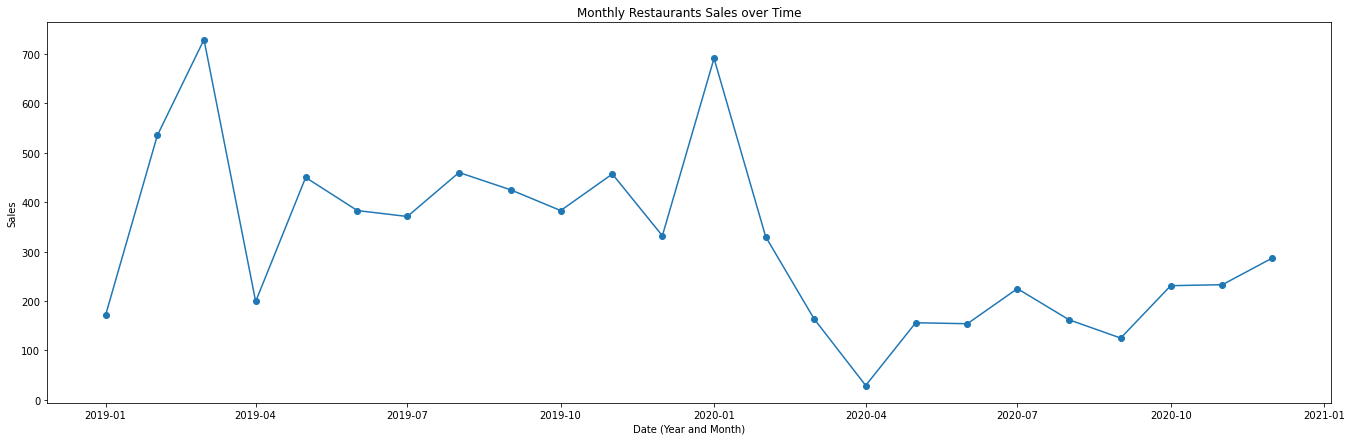

In [241]:
wegmansmonth_RESTdept["monthyear"] =  pd.to_datetime(wegmansmonth_RESTdept["monthyear"])
x = wegmansmonth_RESTdept['monthyear']
y = round(wegmansmonth_RESTdept['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

plt.title("Monthly Restaurants Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [242]:
wegmansmonth_WBdept = wegmansmonth_dept[wegmansmonth_dept.DEPARTMENT_NAME == 'WBRAND & OTHER']

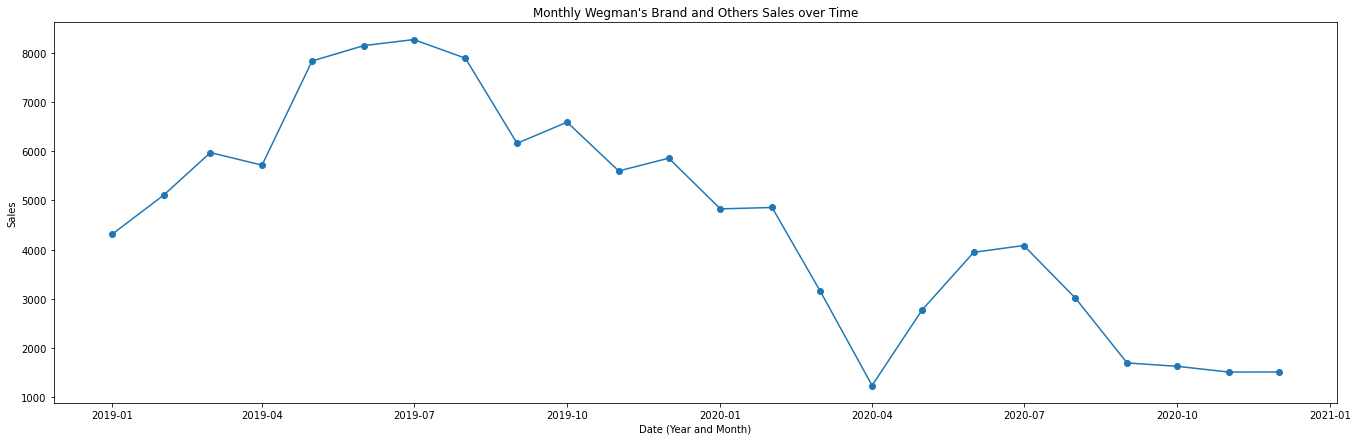

In [243]:
wegmansmonth_WBdept["monthyear"] =  pd.to_datetime(wegmansmonth_WBdept["monthyear"])
x = wegmansmonth_WBdept['monthyear']
y = round(wegmansmonth_WBdept['SALES'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.plot(x, y)

plt.title("Monthly Wegman's Brand and Others Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Sales")
plt.show()

In [246]:
wegmanspred

,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,monthyear,SALES,Yesterday Sales,Week Ago Sales,isWeekend,CATCODES,DEPTCODES,Prediction
439,2019-01-07,ASIAN,ASIAN HOT,2019-01-01,1.43,1.43,0.00,False,14,0,39.0
440,2019-01-07,ASIAN,ASIAN PACKAGED,2019-01-01,41.76,91.42,0.00,False,15,0,332.0
441,2019-01-07,BAKESHOP,BAGELS,2019-01-01,12.70,117.27,0.00,False,23,1,313.0
442,2019-01-07,BAKESHOP,BAKESHOP COOKIES,2019-01-01,35.63,39.06,0.00,False,26,1,57.0
443,2019-01-07,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,2019-01-01,19.35,56.65,0.00,False,27,1,259.0
...,...,...,...,...,...,...,...,...,...,...,...
300640,2020-12-31,SUSHI,SKINNY ROLLS SUSHI,2020-12-01,6.47,12.94,11.50,False,488,41,13.0
300641,2020-12-31,SUSHI,VEGGIE SUSHI,2020-12-01,16.52,25.15,25.14,False,557,41,29.0
300642,2020-12-31,ULTIMATE COFFEE,BREAKFAST,2020-12-01,6.46,3.23,3.23,False,52,42,7.0
300643,2020-12-31,ULTIMATE COFFEE,COLD DRINKS,2020-12-01,2.12,1.69,4.60,False,112,42,5.0
